 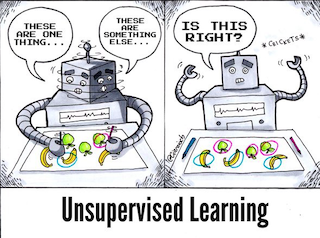

<h1>S11T01: Unsupervised Learning Grouping</h1>

<h2>Libraries</h2>

In [2]:
#python built-in modules
import math

#Data Manipulation
import pandas as pd 
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Data Modeling
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from kneed import KneeLocator
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score




<h2>Notebook Function</h2>

In [3]:
#1 function to the data type to another
def astype_convertion(df,cols,dtype):
    df[cols] = df[cols].astype(dtype)

In [4]:
#2 function to apply to Time a cyclical encoding     
def time_cyclical_encoding(df,col,sin_cos):
    
    hour = df[col].dt.hour*60
    minute = df[col].dt.minute
    
    ct = hour + minute
    
    if sin_cos == "sin": 
        
        ct = np.sin(2*math.pi*ct/1440)
    else:
        
        ct = np.cos(2*math.pi*ct/1440)
    return ct

In [5]:
#3 function to apply to day and month a cyclical encoding 
def date_cyclical_encoding_sin(df,col,time,sin_cos):
    
    if time == "day" :
        day = df[col].dt.day-1
        if sin_cos == "sin": 
        
            ct = np.sin(2*math.pi*day/31)
        
        else:
        
            ct = np.cos(2*math.pi*day/31)
        
        return ct
    elif time == "month" :
        month = df[col].dt.month-1
        if sin_cos == "sin": 
        
            ct = np.sin(2*math.pi*month/12)
        
        else:
        
            ct = np.cos(2*math.pi*month/12)
        
        return ct
    
    else: 
        print("Only Day, Month or DayOfweek")

In [6]:
#4 function to apply to DayOfWeek a cyclical encoding 
def dayOfWeek_cyclical_encoding(df,col,sin_cos):
    
    dayOfWeek = df[col]  - 1 
    
    if sin_cos == "sin": 
        
        ct = np.sin(2*math.pi*dayOfWeek/7)
    else:
        
        ct = np.cos(2*math.pi*dayOfWeek/7)
    return ct

In [7]:
#6: correlation matrix 

def matrix_plot (df,name):

    fig, ax = plt.subplots(figsize=(30, 30))
 # Heatmap Matrix
    sns.heatmap(df, annot=True,fmt='.2g',
                cmap=sns.color_palette("YlGnBu", as_cmap=True), 
                annot_kws = {"size": 10})
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,
                       horizontalalignment = 'right',weight='bold')
    ax.set_yticklabels(ax.get_yticklabels(),rotation = 0,
                       horizontalalignment = 'right',weight='bold')
    ax.tick_params(labelsize = 15)
    fig.suptitle(name, fontsize = 25, fontweight = "bold")
    plt.show()
    
    

**This dataset is composed by the following variables:**<br>
**Year** 2008 <br>
**Month** 1-12 <br>
**DayofMonth** 1-31 <br>
**DayOfWeek** 1 (Monday) - 7 (Sunday)<br>
**DepTime** actual departure time (local, hhmm)<br>
**CRSDepTime** scheduled departure time (local, hhmm)<br>
**ArrTime** actual arrival time (local, hhmm)<br>
**CRSArrTime** scheduled arrival time (local, hhmm)<br>
**UniqueCarrier** unique carrier code<br>
**FlightNum** flight number<br>
**TailNum** plane tail number: aircraft registration, unique aircraft identifier<br>
**ActualElapsedTime** in minutes<br>
**CRSElapsedTime** in minutes<br>
**AirTime** in minutes<br>
**ArrDelay** arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).<br>
**DepDelay** departure delay, in minutes<br>
**Origin** origin IATA airport code<br>
**Dest** destination IATA airport code<br>
**Distance** in miles<br>
**TaxiIn** taxi in time, in minutes<br>
**TaxiOut** taxi out time in minutes<br>
**Cancelled** was the flight cancelled<br>
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security) <br>
**Diverted** 1 = yes, 0 = no<br>
**CarrierDelay in minutes:** Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.<br>
**WeatherDelay in minutes:** Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.<br>
**NASDelay in minutes:** Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.<br>
**SecurityDelay in minutes:** Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.<br>
**LateAircraftDelay in minutes:** Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.<br>

**The original dataset used in this notebook can be found in Kaggle. Use the below link to access it.**
<a href="https://www.kaggle.com/datasets/giovamata/airlinedelaycauses">Airlane Delay</a>

**I Will use a pre-procesed datased of previous work.**

<h2>EDA</h2>

In [8]:
data = pd.read_csv("/Volumes/GoogleDrive/Mi unidad/Barcelona Activa/Itinerario Data Science/S10/DelayedFlightsPreprocesed.csv")

In [9]:
df = data.copy()

In [10]:
df.shape

(1928368, 28)

In [11]:
df.head().T

,0,1,2,3,4
Date,2008-01-03,2008-01-03,2008-01-03,2008-01-03,2008-01-03
DayOfWeek,4,4,4,4,4
DepTime,20:03:00,07:54:00,06:28:00,18:29:00,19:40:00
CRSDepTime,19:55:00,07:35:00,06:20:00,17:55:00,19:15:00
ArrTime,22:11:00,10:02:00,08:04:00,19:59:00,21:21:00
CRSArrTime,22:25:00,10:00:00,07:50:00,19:25:00,21:10:00
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,3920,378
TailNum,N712SW,N772SW,N428WN,N464WN,N726SW
ActualElapsedTime,128,128,96,90,101


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928368 entries, 0 to 1928367
Data columns (total 28 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Date               object
 1   DayOfWeek          int64 
 2   DepTime            object
 3   CRSDepTime         object
 4   ArrTime            object
 5   CRSArrTime         object
 6   UniqueCarrier      object
 7   FlightNum          int64 
 8   TailNum            object
 9   ActualElapsedTime  int64 
 10  CRSElapsedTime     int64 
 11  AirTime            int64 
 12  ArrDelay           int64 
 13  DepDelay           int64 
 14  Origin             object
 15  Dest               object
 16  Distance           int64 
 17  TaxiIn             int64 
 18  TaxiOut            int64 
 19  Cancelled          int64 
 20  CancellationCode   object
 21  Diverted           int64 
 22  CarrierDelay       int64 
 23  WeatherDelay       int64 
 24  NASDelay           int64 
 25  SecurityDelay      int64 
 26  LateAircraftDe

In [13]:
df.shape

(1928368, 28)

<h2> Preproccesing Data</h2>

<h3>Time Cyclical Encoding</h3>

In [14]:
time_list = ['DepTime','CRSDepTime','ArrTime','CRSArrTime']

In [15]:
for t in time_list:
     df[t + "_dt"] = pd.to_datetime(df['Date'] + df[t], format='%Y-%m-%d%H:%M:%S')

In [16]:
time_dt_list = ['DepTime_dt','CRSDepTime_dt','ArrTime_dt','CRSArrTime_dt']

In [17]:
 for dt,t in zip(time_dt_list,time_list):
        df[t + "_sin"] = time_cyclical_encoding(df,dt,"sin")
        df[t + "_cos"] = time_cyclical_encoding(df,dt,"cos")
        

<AxesSubplot:xlabel='DepTime_sin', ylabel='DepTime_cos'>

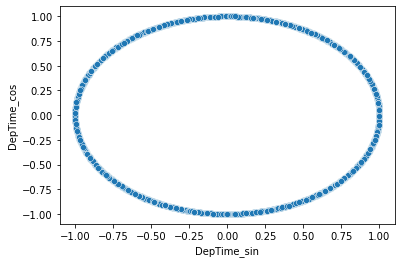

In [18]:
sns.scatterplot(x="DepTime_sin",y="DepTime_cos",data=df)

The plot show the cyclical form of the DepTime in its Sin and Cos values. 

<h3>Day of Week Cyclical Encoding</h3>

In [19]:
df["DayofWeek" + "_sin"] = dayOfWeek_cyclical_encoding(df,"DayOfWeek","sin")
df["DayofWeek" + "_cos"] = dayOfWeek_cyclical_encoding(df,"DayOfWeek","cos")

<AxesSubplot:xlabel='DayofWeek_sin', ylabel='DayofWeek_cos'>

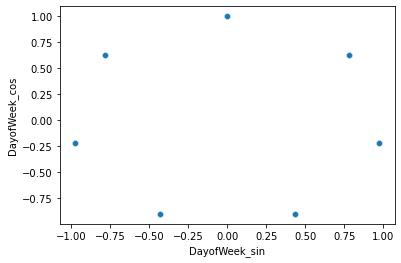

In [20]:
sns.scatterplot(x="DayofWeek_sin",y="DayofWeek_cos",data=df)

The plot show the cyclical form of the day of week in its Sin and Cos values. 

<h3>Month Cyclical Encoding</h3>

In [21]:
df["Month" + "_sin"] = date_cyclical_encoding_sin(df,"DepTime_dt","month","sin")
df["Month" + "_cos"] = date_cyclical_encoding_sin(df,"DepTime_dt","month","cos")

<AxesSubplot:xlabel='Month_sin', ylabel='Month_cos'>

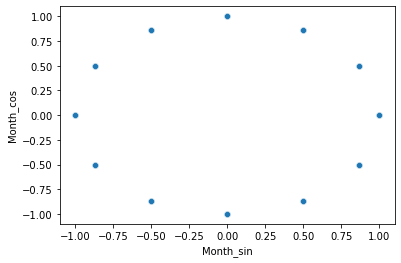

In [22]:
sns.scatterplot(x="Month_sin",y="Month_cos",data=df)

The plot show the cyclical form of the Month in its Sin and Cos values. 

<h3>Day Of the Month Cyclical Encoding</h3>

In [23]:
df["Day" + "_sin"] = date_cyclical_encoding_sin(df,'ArrTime_dt',"day","sin")
df["Day" + "_cos"] = date_cyclical_encoding_sin(df,'ArrTime_dt',"day","cos")

<AxesSubplot:xlabel='Day_sin', ylabel='Day_cos'>

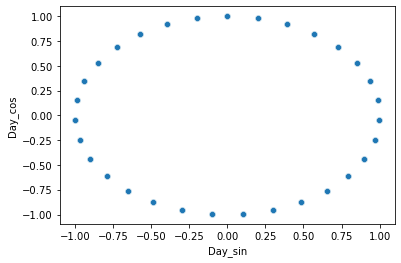

In [24]:
 sns.scatterplot(x="Day_sin",y="Day_cos",data=df)

The plot show the cyclical form of the Day in its Sin and Cos values. 

<h3>Drop columns</h3>

In [25]:
#create a copy of the dataframe before drop the columns   
df_copy = df.copy()

Some of the columns have been coded in a cyclic form so that they can be safely drop, another feature can be removed because it doesn't add more insight. 

In [26]:
drop_columns = ['Date','DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 
                'CRSArrTime','CancellationCode','OrdinalDate',
                'Cancelled','Diverted']

In [27]:
dtime_columns = df.select_dtypes(include='datetime').columns
dtime_columns

Index(['DepTime_dt', 'CRSDepTime_dt', 'ArrTime_dt', 'CRSArrTime_dt'], dtype='object')

In [28]:
df.drop(columns=drop_columns,inplace=True)
df.drop(columns=dtime_columns,inplace=True)

<h3>Change Data Type </h3>

In [29]:
object_columns = df.select_dtypes(include = ["O"]).columns 

In [30]:
astype_convertion(df,object_columns,"category") 

In [31]:
astype_convertion(df,'FlightNum',"category") 

In [32]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928368 entries, 0 to 1928367
Data columns (total 32 columns):
 #   Column             Dtype   
---  ------             -----   
 0   UniqueCarrier      category
 1   FlightNum          category
 2   TailNum            category
 3   ActualElapsedTime  int64   
 4   CRSElapsedTime     int64   
 5   AirTime            int64   
 6   ArrDelay           int64   
 7   DepDelay           int64   
 8   Origin             category
 9   Dest               category
 10  Distance           int64   
 11  TaxiIn             int64   
 12  TaxiOut            int64   
 13  CarrierDelay       int64   
 14  WeatherDelay       int64   
 15  NASDelay           int64   
 16  SecurityDelay      int64   
 17  LateAircraftDelay  int64   
 18  DepTime_sin        float64 
 19  DepTime_cos        float64 
 20  CRSDepTime_sin     float64 
 21  CRSDepTime_cos     float64 
 22  ArrTime_sin        float64 
 23  ArrTime_cos        float64 
 24  CRSArrTime_sin     float

 <h3>Encoding Categorical Variables</h3>

There are categorical feautures that must be coded, these features will be encoded <br> 
by Label Encoding since there is no target feature and we do not want to <br>make the dataset larger.  

In [33]:
objects_to_encoding = df.select_dtypes(include = ["category"]).columns 
objects_to_encoding

Index(['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest'], dtype='object')

In [34]:
#create the categorical values names for encoding

encoding_variables_names = []

for i in objects_to_encoding:
    name = "encoded_" + i
    encoding_variables_names.append(name)

encoding_variables_names

['encoded_UniqueCarrier',
 'encoded_FlightNum',
 'encoded_TailNum',
 'encoded_Origin',
 'encoded_Dest']

In [35]:
LabelEncoder = preprocessing.LabelEncoder()  

for i in objects_to_encoding:
    df[i] = LabelEncoder.fit_transform(df[i])
   

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928368 entries, 0 to 1928367
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   UniqueCarrier      int64  
 1   FlightNum          int64  
 2   TailNum            int64  
 3   ActualElapsedTime  int64  
 4   CRSElapsedTime     int64  
 5   AirTime            int64  
 6   ArrDelay           int64  
 7   DepDelay           int64  
 8   Origin             int64  
 9   Dest               int64  
 10  Distance           int64  
 11  TaxiIn             int64  
 12  TaxiOut            int64  
 13  CarrierDelay       int64  
 14  WeatherDelay       int64  
 15  NASDelay           int64  
 16  SecurityDelay      int64  
 17  LateAircraftDelay  int64  
 18  DepTime_sin        float64
 19  DepTime_cos        float64
 20  CRSDepTime_sin     float64
 21  CRSDepTime_cos     float64
 22  ArrTime_sin        float64
 23  ArrTime_cos        float64
 24  CRSArrTime_sin     float64
 25  CRSArrTime_cos    

In [37]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueCarrier,1928368.0,11.123611,5.933309,0.000000,6.000000,1.300000e+01,17.000000,19.000000
FlightNum,1928368.0,2176.468894,1933.658113,0.000000,609.000000,1.538000e+03,3418.000000,7497.000000
TailNum,1928368.0,2710.599580,1525.180412,0.000000,1415.000000,2.647000e+03,3987.000000,5359.000000
ActualElapsedTime,1928368.0,133.305891,72.060116,14.000000,80.000000,1.160000e+02,165.000000,1114.000000
CRSElapsedTime,1928368.0,134.197721,71.233433,-21.000000,82.000000,1.160000e+02,165.000000,660.000000
AirTime,1928368.0,108.277192,68.642652,0.000000,58.000000,9.000000e+01,137.000000,1091.000000
ArrDelay,1928368.0,0.630072,0.482785,0.000000,0.000000,1.000000e+00,1.000000,1.000000
DepDelay,1928368.0,43.091598,53.265773,6.000000,12.000000,2.400000e+01,53.000000,2467.000000
Origin,1928368.0,146.495721,80.105233,0.000000,80.000000,1.550000e+02,210.000000,302.000000
Dest,1928368.0,149.970765,80.759155,0.000000,80.000000,1.570000e+02,215.000000,301.000000


 <h3>PCA</h3>

In [38]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df.head().T 

,0,1,2,3,4
UniqueCarrier,0.990407,0.990407,0.990407,0.990407,0.990407
FlightNum,-0.953358,0.542770,-0.894920,0.899089,-0.931121
TailNum,0.685428,0.921465,-0.500006,-0.381332,0.739847
ActualElapsedTime,-0.073631,-0.073631,-0.517705,-0.600969,-0.448319
CRSElapsedTime,0.221838,0.151646,-0.620463,-0.620463,-0.269504
AirTime,0.112507,0.068803,-0.470221,-0.455653,-0.309971
ArrDelay,-1.305077,-1.305077,-1.305077,0.766238,-1.305077
DepDelay,-0.658802,-0.452291,-0.658802,-0.170684,-0.339648
Origin,-0.143508,-0.143508,-0.081090,-0.081090,-0.081090
Dest,1.659617,1.659617,-1.262653,-1.262653,-0.012020


In [39]:
pca_pipe = make_pipeline(PCA(random_state=7))

In [40]:
pca_pipe.fit(scaled_df) 

Pipeline(steps=[('pca', PCA(random_state=7))])

In [41]:
pca_model = pca_pipe.named_steps['pca']
pca_model

PCA(random_state=7)

In [42]:
pc_list = []

for i,val in enumerate(df.columns):
    pc = "PC_" + str(i+1)
    pc_list.append(pc)

In [43]:
pca_df = pd.DataFrame(data= pca_model.components_, 
                      columns = scaled_df.columns,
                      index   = pc_list)
    
pca_df.T

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32
UniqueCarrier,-0.027080,-0.142284,0.006641,-0.075226,0.216622,-0.421120,0.101767,0.083113,0.335346,0.065444,...,-0.000565,-0.000998,-0.001167,-0.016242,0.001900,-0.004652,-0.000073,0.000009,-0.000589,-1.363250e-14
FlightNum,-0.061380,-0.200328,0.033681,0.102887,-0.081297,-0.021494,0.174666,0.132739,0.317568,-0.021219,...,-0.022950,-0.007044,-0.000728,0.003898,0.004782,0.017726,-0.002093,0.000224,-0.000479,-5.739295e-15
TailNum,-0.013712,-0.052588,0.008904,0.015128,-0.113183,0.336078,0.176859,0.212828,0.271977,-0.054076,...,0.003620,-0.006641,0.001369,-0.002480,-0.000013,-0.008315,0.000146,-0.000461,0.000412,-9.166983e-16
ActualElapsedTime,0.082673,0.467543,-0.046094,0.052185,-0.039007,-0.036038,0.040651,0.033650,0.052970,-0.002774,...,0.008494,0.079407,-0.008002,0.340963,-0.044052,-0.148469,-0.001666,0.008505,-0.293177,7.157167e-01
CRSElapsedTime,0.081185,0.466504,-0.056259,-0.019968,0.065890,0.015230,0.035159,0.031889,0.062028,-0.006580,...,0.003752,0.040370,-0.021370,-0.401893,0.029479,-0.473117,-0.006725,-0.014142,0.598202,-9.213198e-15
AirTime,0.075497,0.466827,-0.056736,-0.016557,0.079091,-0.001092,0.036996,0.030541,0.062844,-0.007502,...,0.007397,0.080940,-0.009782,0.389655,-0.049138,-0.160546,-0.002507,0.007937,-0.293283,-6.817737e-01
ArrDelay,0.076054,-0.013616,0.143962,0.435903,0.039872,-0.061914,-0.016494,-0.019203,-0.098908,-0.008043,...,-0.000581,-0.021479,-0.035566,-0.073312,0.015879,-0.013251,-0.004951,0.005209,-0.015040,3.396115e-16
DepDelay,0.094056,-0.008287,0.217202,0.497929,0.311808,0.065285,0.040597,-0.004004,0.034822,0.016160,...,-0.008310,-0.008643,0.028302,-0.410350,0.110144,-0.191641,-0.019970,0.114120,-0.441632,7.359183e-16
Origin,-0.012131,0.026592,-0.018003,-0.015209,0.218268,-0.322504,-0.368889,-0.085872,0.431319,0.124057,...,0.017312,0.041304,-0.008139,0.001071,-0.001358,-0.014242,0.000895,0.000847,-0.000041,8.078986e-18
Dest,0.004152,0.038795,0.010106,-0.055169,0.162881,-0.501154,0.364725,0.140719,-0.180670,-0.065187,...,-0.005114,-0.034152,-0.000520,-0.009556,0.000769,0.005954,0.000327,0.000059,0.000093,-1.663552e-16


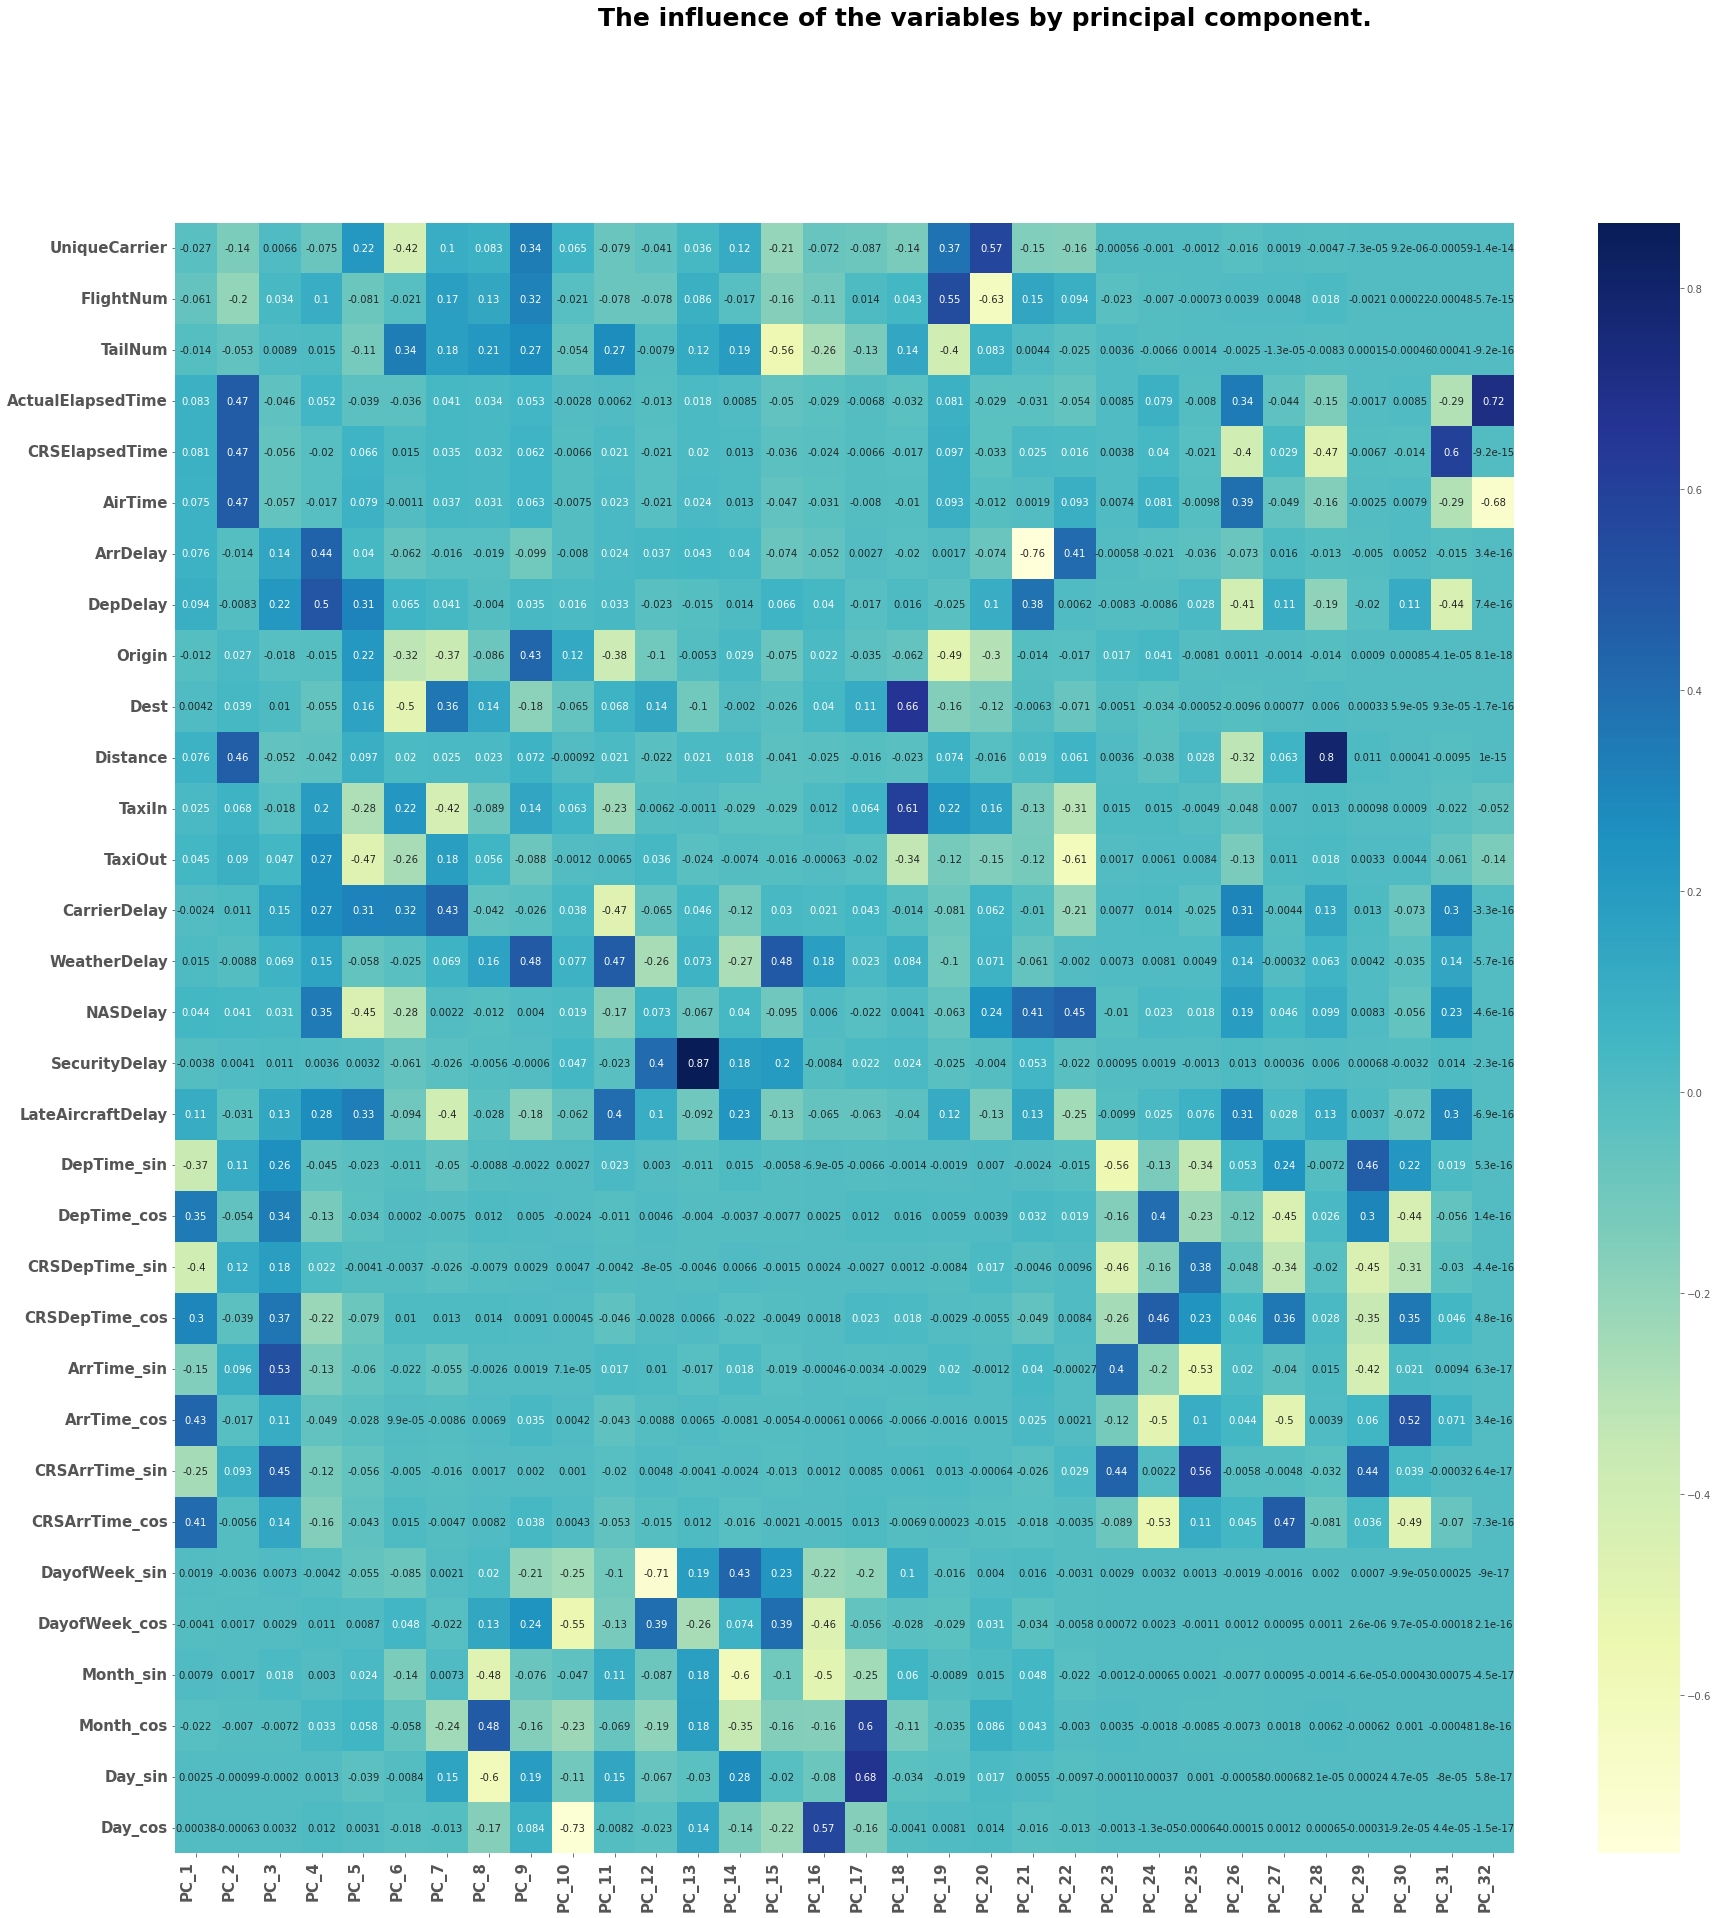

In [44]:
plt.style.use('ggplot')
matrix_plot (pca_df.T,"The influence of the variables by principal component.")

The matrix shows that the time features have more weight in the for PC_1 and the rest have a similar impact.

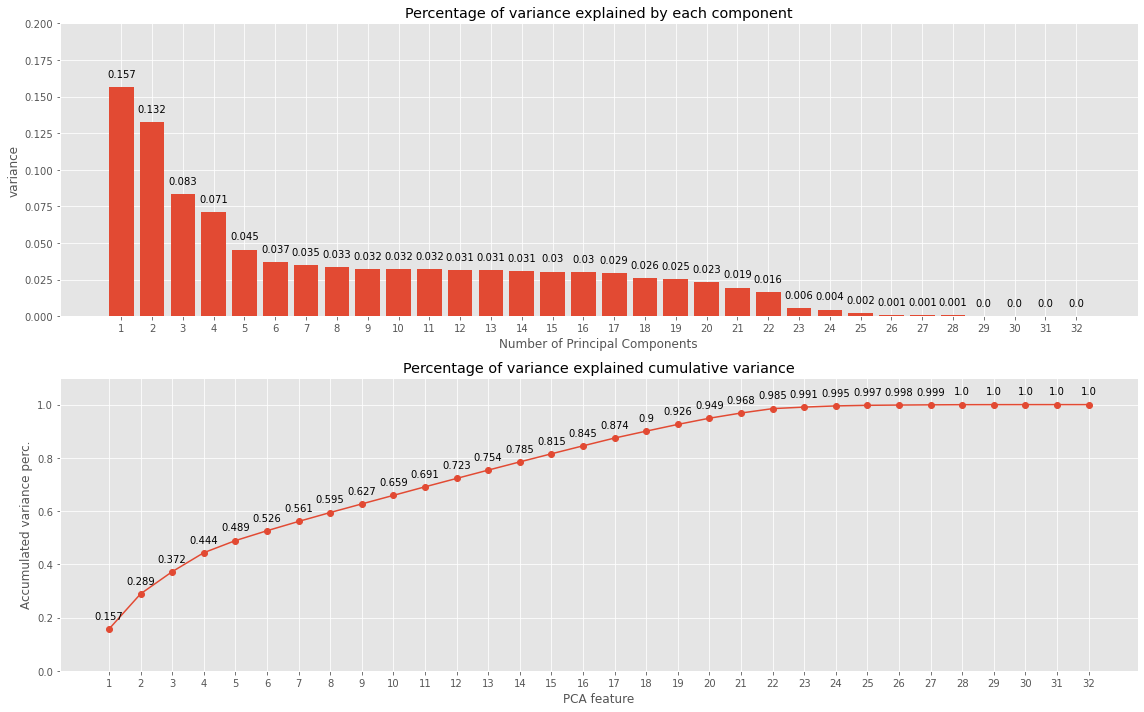

In [45]:
plt.style.use('ggplot')

pc_n = np.arange(pca_model.n_components_) + 1 
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum() 
y_max = round(pca_model.explained_variance_ratio_.max()+.05,1)  

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
    
axes[0].bar(
        x     = pc_n,
        height = pca_model.explained_variance_ratio_)


axes[0].set_xlabel('Number of Principal Components')
axes[0].set_ylabel('variance')
axes[0].set_title('Percentage of variance explained by each component')
axes[0].set_xticks(pc_n)
axes[0].set_ylim(0, y_max)

for x, y in zip(pc_n, pca_model.explained_variance_ratio_):
    label = round(y, 3)
    axes[0].annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )



axes[1].plot(
np.arange(len(df.columns)) + 1,
prop_varianza_acum,
marker='o')


for x, y in zip(pc_n, prop_varianza_acum):
         label = round(y, 3)
         axes[1].annotate(
             label,
             (x, y),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center'
         )

axes[1].set_ylim(0, 1.1)
axes[1].set_xticks(pc_n)
axes[1].set_title('Percentage of variance explained cumulative variance')
axes[1].set_xlabel('PCA feature')
axes[1].set_ylabel('Accumulated variance perc.')

plt.xticks(pc_n)
plt.tight_layout()
plt.grid(True)
plt.show()

The first 6 PCs have more than 50% of the variance and then have a similar distribution until PC_21 where 95% of the variance is reached, maybe be can use only 6 PC for the K-Means but we need to verify it later.

In [46]:
pca_clustering = PCA(n_components=21, random_state=42)

clustering_array = pca_clustering.fit_transform(scaled_df)

In [47]:
pc21_list = []
for i,val in enumerate( np.arange(1, 22)):
    pc = "PC_" + str(i+1)
    pc21_list.append(pc)

In [48]:
pca_PC21_df = pd.DataFrame(data= clustering_array , columns=pc21_list)
pca_PC21_df.T 

,0,1,2,3,4,5,6,7,8,9,...,1928358,1928359,1928360,1928361,1928362,1928363,1928364,1928365,1928366,1928367
PC_1,2.275411,-3.777021,-3.477211,1.779164,2.133572,2.890394,-3.578725,1.076130,-3.994953,0.039042,...,-2.086043,0.101677,0.395328,-3.557138,0.115496,-1.147780,-3.084274,-2.970038,-1.979045,-2.623612
PC_2,-0.172807,0.681180,0.005890,-1.941730,-1.015811,2.295075,1.000346,-0.529541,-1.439652,2.462341,...,-0.934171,-0.694163,-0.649398,0.207100,-2.462140,0.504526,0.698802,1.113943,-0.261187,0.390798
PC_3,0.502399,1.939654,3.266709,-0.477973,-0.027515,-0.306244,2.447513,-1.095483,1.052571,-2.388028,...,-0.974118,-1.597091,-2.086929,1.902111,-1.514621,-1.650896,3.723065,1.663712,-1.721465,-1.332070
PC_4,-2.542552,-1.671754,-2.201118,-0.123806,-2.006273,-0.157187,-1.929189,1.135676,-1.383171,-0.765786,...,0.858832,0.799358,-0.682656,0.779735,0.530019,0.987514,0.907405,1.718672,-0.255153,-0.603554
PC_5,0.392693,0.247743,-0.443187,0.550135,0.182517,1.628193,-0.255723,1.937012,0.129607,1.279193,...,-0.334711,0.307826,-0.611375,-0.563584,-0.274348,-0.105918,-1.868415,-0.600769,-0.752367,-0.191138
PC_6,-0.953999,-1.032474,-0.271197,-0.146222,-0.126387,-0.231073,-0.650887,-0.920376,-1.029287,-1.063508,...,2.050316,-0.897170,2.015988,1.348429,2.138103,1.719085,0.439026,0.971997,1.953672,1.636630
PC_7,0.667881,0.597577,-0.898689,-0.534643,0.068138,0.052512,-0.184196,-0.802575,-0.543823,-0.014056,...,-1.085722,-0.130781,-0.862285,1.163128,-1.095754,-1.144147,-1.982425,-0.392666,-1.301819,-1.316509
PC_8,0.459871,0.567266,-0.329147,-0.081637,0.187041,0.365349,0.127676,-0.220344,-0.288309,-0.002191,...,0.361821,0.278059,0.422934,0.774398,0.258699,0.390703,0.306152,0.743051,0.120781,0.301709
PC_9,-0.296550,0.064770,-0.420802,-0.044159,-0.059421,-0.001330,-0.331270,-0.889171,-0.665529,-0.351092,...,0.223879,-0.274299,0.815246,-0.905277,0.087344,0.704109,1.951179,-0.991387,0.328363,1.159649
PC_10,-0.931066,-0.954951,-0.660970,-0.783690,-0.808033,-0.946140,-0.809849,-0.850792,-0.716062,-0.790226,...,0.890878,1.021787,1.000935,0.659758,0.914291,0.978863,1.570265,0.535439,1.041928,1.106365


In [49]:
print("original shape:   ", df.shape)
print("transformed shape:", pca_PC21_df.shape)

original shape:    (1928368, 32)
transformed shape: (1928368, 21)


The PCA helps to reduce the dimension of the DataSet to 21 features without loosing important insights. 

 <h2>Level 1</h2>
 <h3>Exercise 1</h3>

**Group the different flights using K-means algorithm**

In [50]:
#I know this dataset from previous exercise so I will sample it to 5%  
sample_df = pca_PC21_df.sample(frac=0.05, random_state=7)

print("the shape of the sample DF is {}".format(sample_df.shape))
sample_df.head().T 

the shape of the sample DF is (96418, 21)


,258182,437414,1499466,1549589,23091
PC_1,1.921690,0.794537,2.724801,1.673346,-0.669639
PC_2,-0.419542,-3.165526,2.304652,-1.740521,-1.346261
PC_3,-0.627985,-1.200955,2.831202,-0.756361,-1.946598
PC_4,-1.643473,-1.165235,-0.673770,-0.705609,-0.808675
PC_5,-0.187700,-0.061525,-0.016147,-1.225132,0.362436
PC_6,0.636896,-1.203451,1.142069,0.674653,0.139501
PC_7,-0.574910,1.086485,-1.379043,-0.932403,-1.213489
PC_8,-0.642948,-0.370764,0.502022,0.862362,0.864232
PC_9,1.319948,-0.113368,-0.694290,1.646801,-0.312376
PC_10,0.273544,-0.015163,0.756859,1.056357,0.724662


<h4>Elbow method</h4>

In [51]:
#get the optimal number of cluster
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(sample_df)
    sse.append(kmeans.inertia_)   

In [52]:
kl = KneeLocator(
    range(1, 20), sse, curve="convex", direction="decreasing"
    )

elbow = kl.elbow


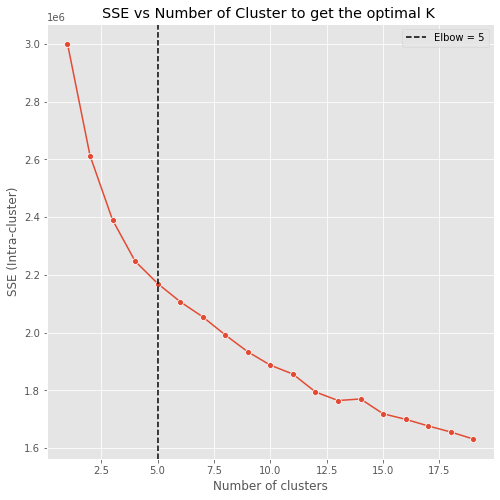

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(x =range(1, 20), y=sse, marker='o')
 
ax.set_title("SSE vs Number of Cluster to get the optimal K ")
ax.set_xlabel('Number of clusters')
ax.set_ylabel('SSE (Intra-cluster)')
ax.axvline(x=elbow, c = 'black', linestyle='--', label=f'Elbow = {elbow}')
ax.legend()
plt.show()

The elbow method computes 5 clusters. 

 <h4>KMeans</h4>

In [54]:
#initializing the model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=7)
kmeans.fit(sample_df)

KMeans(n_clusters=5, random_state=7)

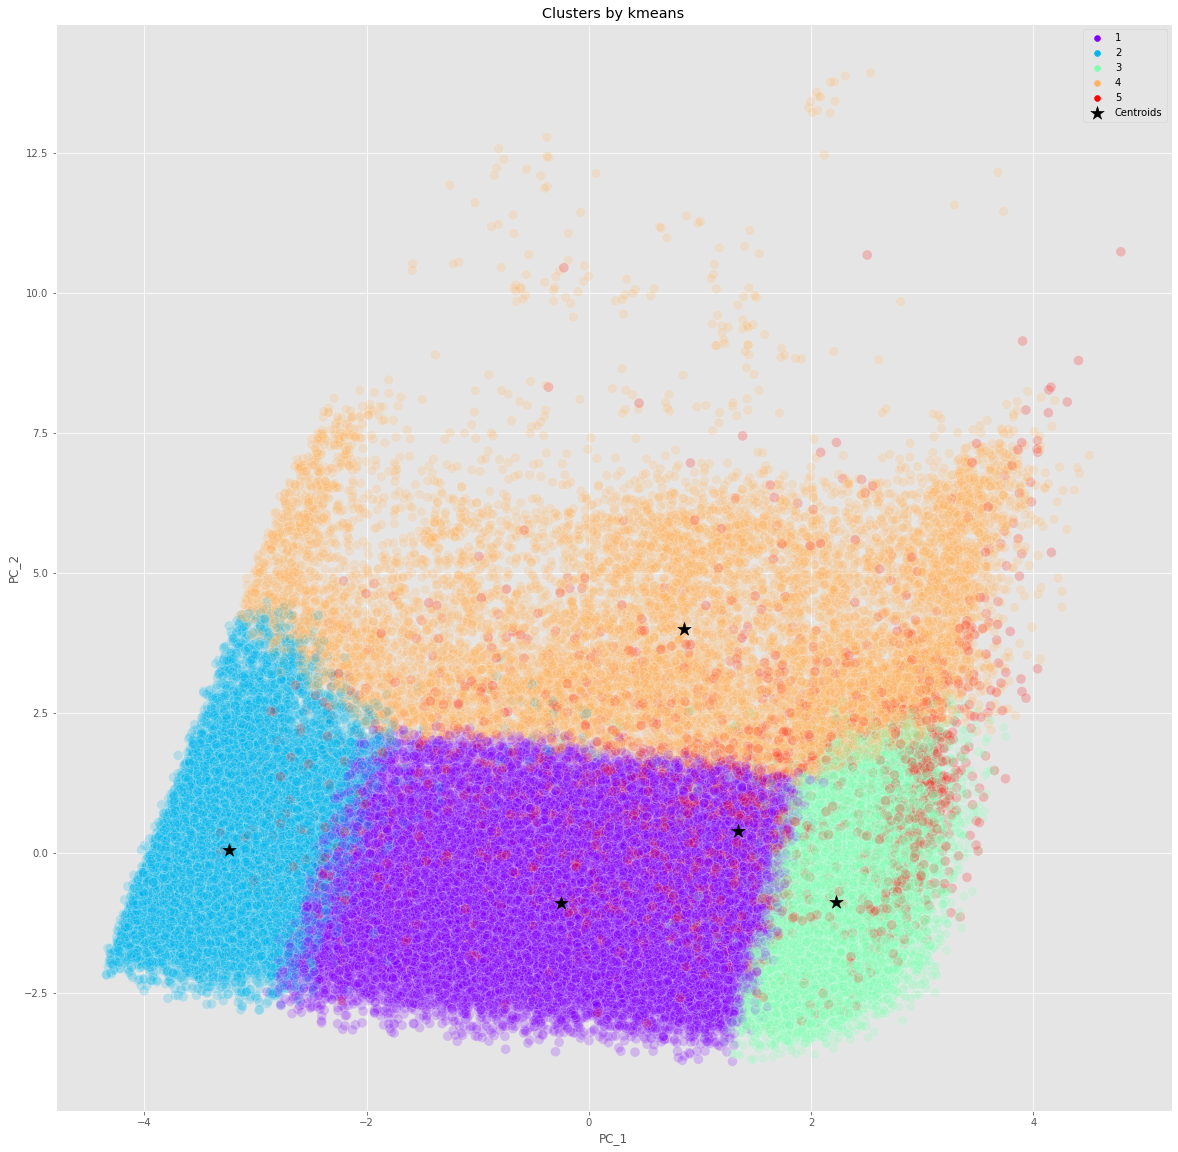

In [55]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.scatterplot(x="PC_1", y="PC_2",
                data=sample_df,
                hue=kmeans.labels_+1,
                alpha=.2,
                palette = 'rainbow',
                s=100
               )
ax.set_title("Clusters by kmeans")
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.scatter(
    x = kmeans.cluster_centers_[:, 0],
    y = kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'Centroids'
)
ax.legend()
plt.show()

The variance for the 2 PC is 28.9% the first 3 cluster have a more defined shape, cluster 4 <br> and 5 are more dispersed. 

In [56]:
#add observation cluster to the dataframe
clustering = kmeans.predict(pca_PC21_df ) + 1
  
kmeans_classified = scaled_df.copy() 
kmeans_classified['Cluster'] = clustering 
kmeans_classified.head().T

,0,1,2,3,4
UniqueCarrier,0.990407,0.990407,0.990407,0.990407,0.990407
FlightNum,-0.953358,0.542770,-0.894920,0.899089,-0.931121
TailNum,0.685428,0.921465,-0.500006,-0.381332,0.739847
ActualElapsedTime,-0.073631,-0.073631,-0.517705,-0.600969,-0.448319
CRSElapsedTime,0.221838,0.151646,-0.620463,-0.620463,-0.269504
AirTime,0.112507,0.068803,-0.470221,-0.455653,-0.309971
ArrDelay,-1.305077,-1.305077,-1.305077,0.766238,-1.305077
DepDelay,-0.658802,-0.452291,-0.658802,-0.170684,-0.339648
Origin,-0.143508,-0.143508,-0.081090,-0.081090,-0.081090
Dest,1.659617,1.659617,-1.262653,-1.262653,-0.012020


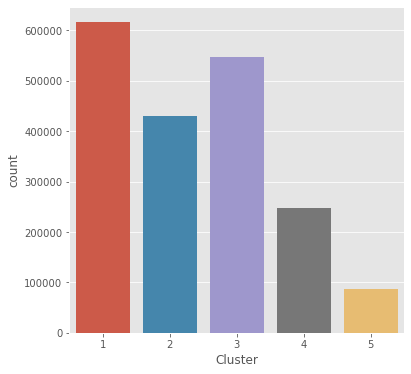

In [57]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x = kmeans_classified['Cluster'])
plt.show() 

The first cluster have a more data.

In [60]:
cluster_group = kmeans_classified.groupby("Cluster").mean()
cluster_group

,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,...,ArrTime_sin,ArrTime_cos,CRSArrTime_sin,CRSArrTime_cos,DayofWeek_sin,DayofWeek_cos,Month_sin,Month_cos,Day_sin,Day_cos
Cluster,,,,,,,,,,,,,,,,,,,,,
1,0.067745,0.148634,0.049985,-0.367888,-0.347393,-0.343802,-0.095799,-0.174704,-0.019299,-0.062041,...,-0.809003,-0.319706,-0.678491,-0.371410,-0.016325,-0.005235,-0.017631,0.019034,-0.002332,-0.002443
2,0.055504,0.178451,0.028416,-0.300336,-0.304392,-0.292776,-0.138458,-0.212379,0.011232,0.003266,...,1.076906,-1.229542,1.302661,-1.122825,0.009688,0.013014,-0.008656,0.058285,-0.004755,-0.000781
3,0.069816,-0.018780,0.007600,-0.306774,-0.277482,-0.292087,0.142590,0.128484,-0.050887,0.001688,...,0.077590,1.114261,-0.193873,1.147392,0.014574,-0.009192,0.027490,-0.032115,0.001084,-0.000959
4,-0.352028,-0.689707,-0.178790,1.947849,2.004890,2.012463,-0.103586,-0.091653,0.164139,0.183796,...,0.049303,0.257770,0.009783,0.301715,-0.019411,0.001564,-0.004582,-0.050979,-0.001075,-0.002251
5,-0.191398,0.152667,-0.032649,0.470191,-0.006284,-0.018778,0.766118,1.753419,-0.066894,-0.112403,...,-0.216971,0.586442,-0.435360,0.087503,0.031647,0.026507,0.007614,-0.075571,0.036552,0.033915


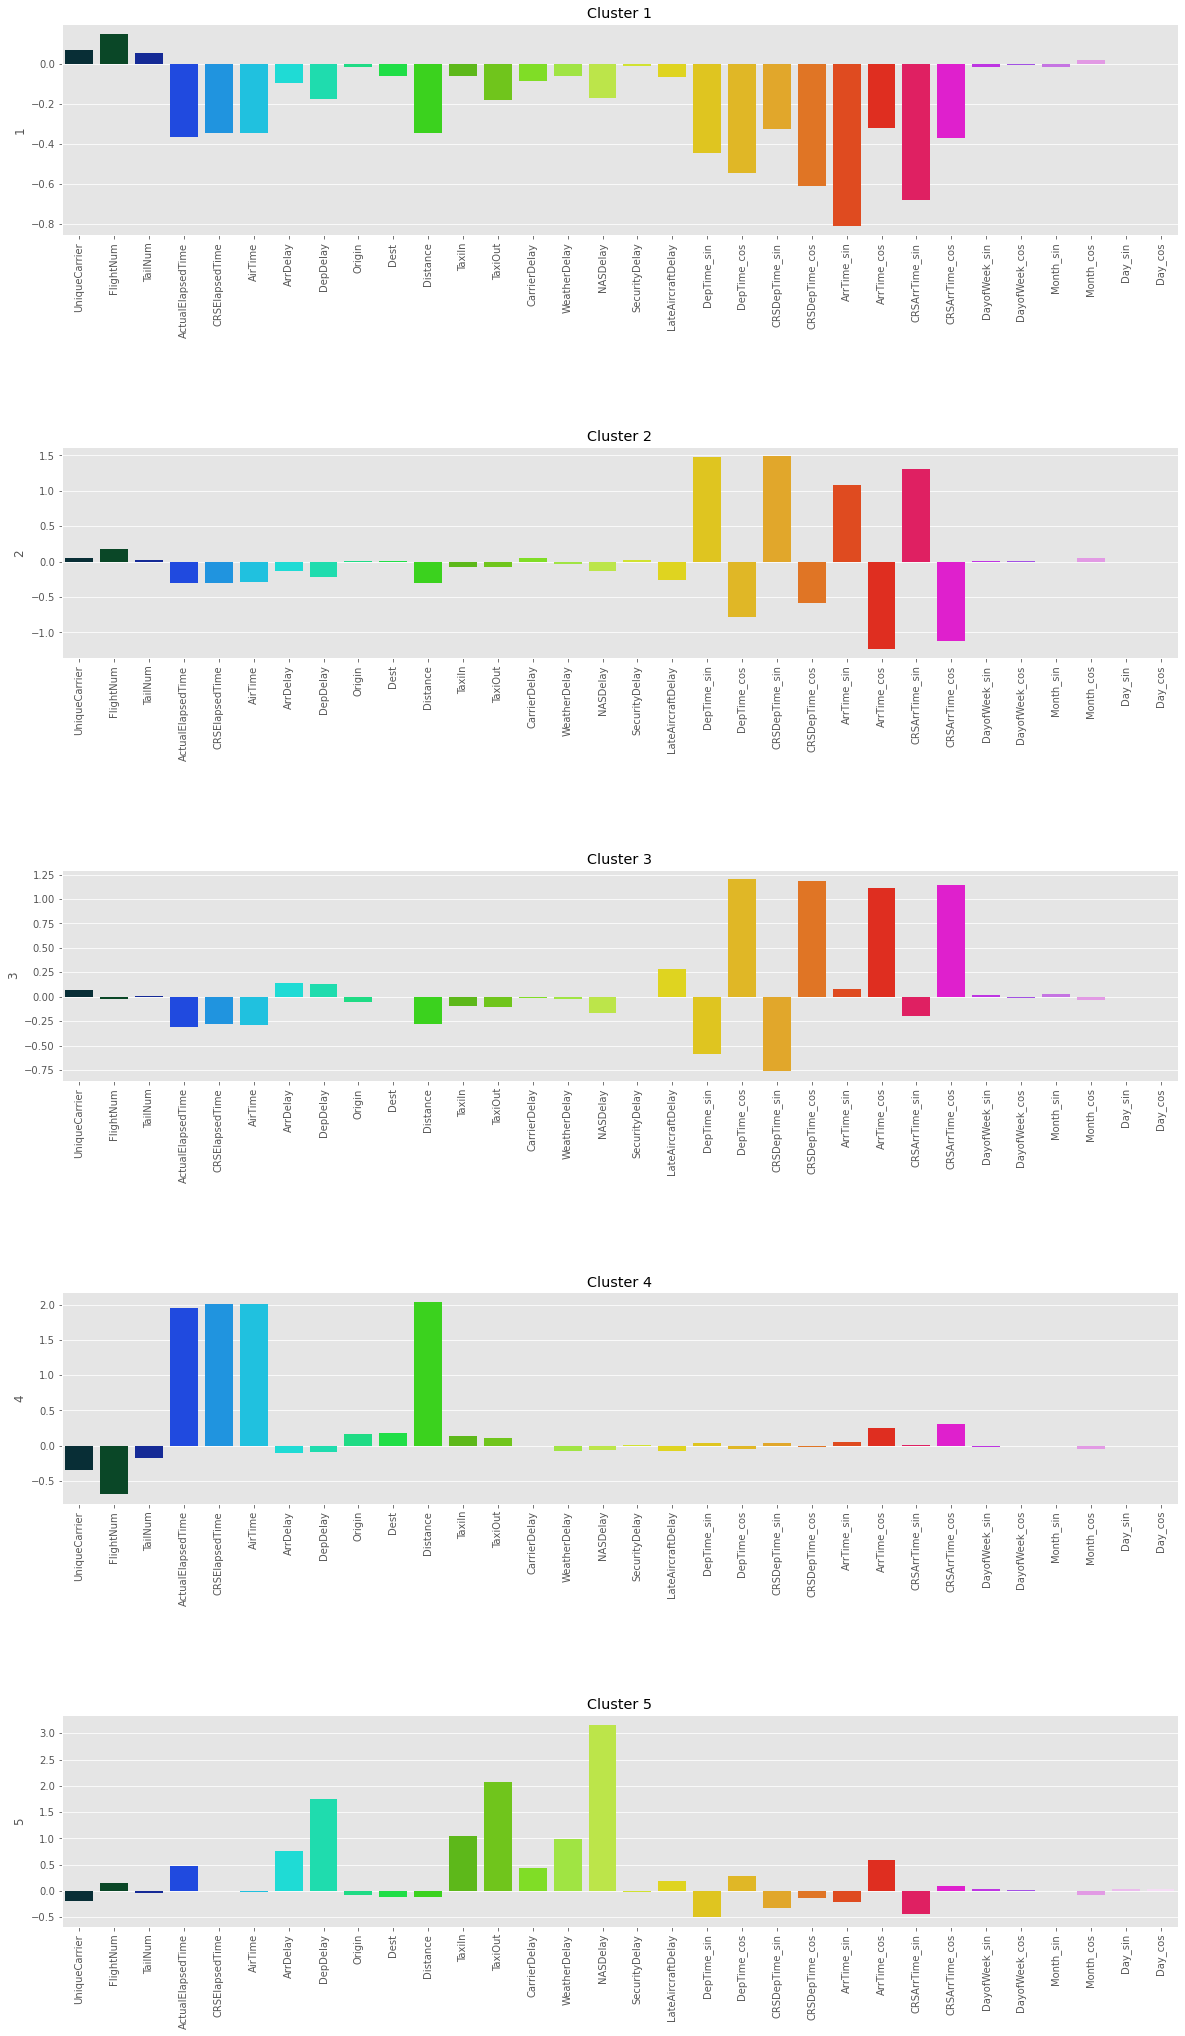

In [73]:
fig, ax = plt.subplots(nrows=5, figsize=(20, 35))
plt.subplots_adjust(hspace = 1)

 
for cluster in range(0,5):
     
    sns.barplot(y=cluster_group.iloc[cluster] ,  x=cluster_group.columns,
                palette="gist_ncar",ax=ax[cluster])
    ax[cluster].set_title(f'Cluster {cluster+1 }')
    ax[cluster].set_xticklabels(labels=cluster_group.columns, rotation=90)
 

Cluster 1 is mostly composed of flight schedules.<br>
Cluster 2  is composed mostly of flight schedules in the cyclic form sin.<br>
Cluster 3 is mostly composed of the flight schedules in their cyclic form cos.<br>
Cluster 4 is mostly composed of flight duration and distance.<br>
Cluster 5 is mostly composed of delays.<br>

 <h2>Level 2</h2>
 <h3>Exercise 2</h3>

**Group the different flights using the hierarchical clustering algorithm.**

In [74]:
cluster_five = pca_PC21_df[["PC_1","PC_2","PC_3","PC_4","PC_5"]]

In [75]:
#concat the 5 PC with the Kmean dataframe 
cluster_df = pd.concat([kmeans_classified,cluster_five],axis=1)

In [76]:
cluster_sample_df = cluster_df.sample(frac=0.009, random_state=7)
cluster_sample_df

,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,...,Month_sin,Month_cos,Day_sin,Day_cos,Cluster,PC_1,PC_2,PC_3,PC_4,PC_5
258182,0.653327,-0.847342,1.127343,-0.170773,0.067416,-0.149720,-1.305077,-0.621255,0.792761,-1.398861,...,0.603178,1.127292,1.405294,-0.037484,3,1.921690,-0.419542,-0.627985,-1.643473,-0.187700
437414,0.484787,1.694473,0.055994,-1.267080,-1.252189,-1.242336,-1.305077,-0.527386,0.131131,1.250995,...,1.157423,0.634973,1.113390,-0.837979,1,0.794537,-3.165526,-1.200955,-1.165235,-0.061525
1499466,-1.706234,-0.718053,-0.627860,0.911657,1.274715,0.972032,0.766238,0.561494,0.193549,-0.854031,...,-1.465290,-0.710065,-1.313090,0.529898,3,2.724801,2.304652,2.831202,-0.673770,-0.016147
1549589,0.316247,2.265929,0.582489,-0.434441,-0.311619,-0.615903,-1.305077,-0.471064,0.967531,0.000362,...,-1.668158,-0.037546,0.423553,-1.325631,3,1.673346,-1.740521,-0.756361,-0.705609,-1.225132
23091,0.990407,-0.046269,-1.094035,-0.573214,-0.550272,-0.470221,-1.305077,-0.546159,0.031262,-1.423626,...,-0.153934,1.307492,-1.384285,0.250626,1,-0.669639,-1.346261,-1.946598,-0.808675,0.362436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356393,-1.200614,-0.688058,-0.014162,2.757339,2.327591,2.574534,0.766238,-0.395969,0.043746,1.436732,...,0.603178,1.127292,0.145330,-1.383702,4,2.922178,5.203907,2.612439,-0.501508,-1.284480
1790088,0.484787,1.321605,-0.559671,-0.684233,-0.676617,-0.645039,0.766238,-0.414743,0.642958,1.436732,...,-0.911046,1.127292,-1.014141,1.017021,1,-1.902201,-1.391663,-1.143748,0.553791,0.836591
1025022,0.147707,-0.540669,-0.057436,-0.642601,-0.578348,-0.674176,0.766238,-0.358422,-1.229579,-0.779736,...,0.603178,-1.202383,-1.398671,-0.037484,2,-3.557005,-0.366642,1.216338,0.199933,-0.672273
35587,1.158947,0.156455,-1.381869,0.620234,0.923756,0.695236,0.766238,0.430077,-0.630367,0.309925,...,-0.153934,1.307492,0.556902,1.344929,1,-1.287937,1.197773,-1.187212,1.034577,1.328356


I had to reduce the sample size to run the models in my computer.

<h4>Dendrogram</h4>

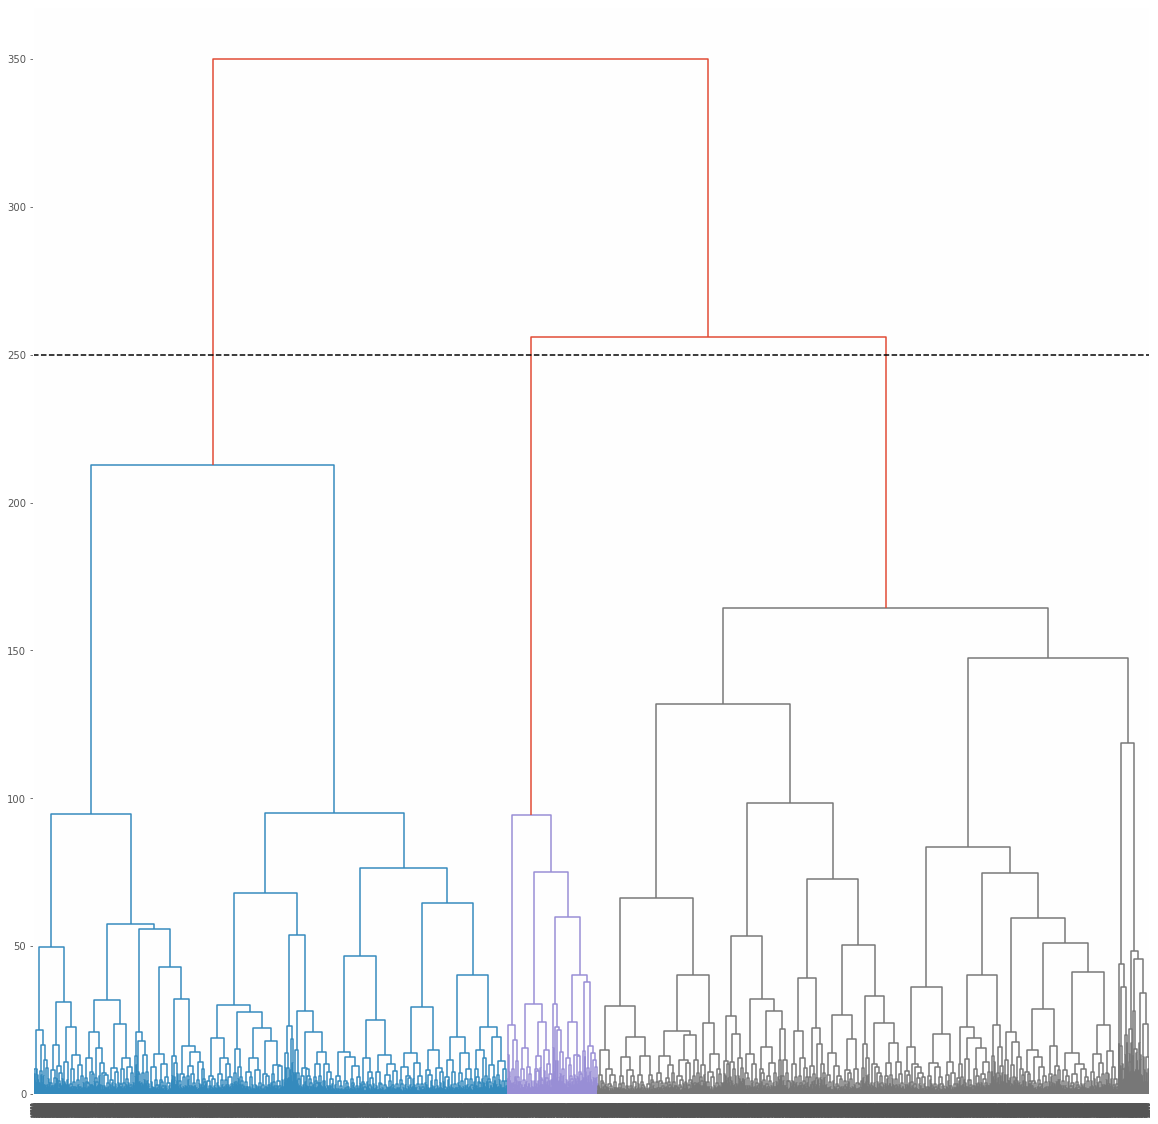

In [62]:
fig, ax = plt.subplots(figsize=(20,20))    
dendogram = shc.dendrogram(shc.linkage(cluster_sample_df[["PC_1","PC_2","PC_3","PC_4","PC_5"]], 
                                       method='ward'))
ax.axhline(y = 250 , color = 'k', linestyle = '--')
plt.show()

the highest vertical distance that doesn’t intersect with any clusters is the intersection with the red dot line, this line say that are at least 3 clusters.  

<h4>Silhouette Coefficient</h4>

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

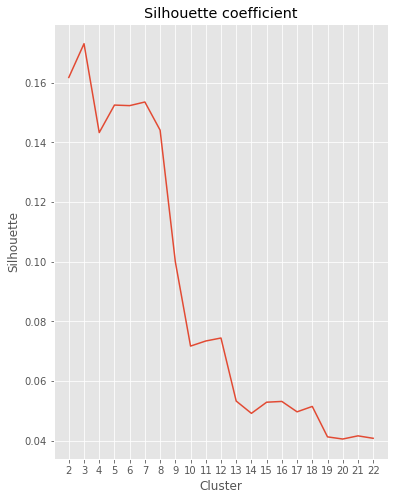

In [67]:
range_clusters = range(2, 23)
mean_silhouette = []

for n_clusters in range_clusters:
    hier = AgglomerativeClustering(
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = hier.fit_predict(cluster_sample_df)
    silhouette_avg = silhouette_score(cluster_sample_df, cluster_labels)
    mean_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(figsize=(6, 8))
sns.lineplot(range_clusters, mean_silhouette,markers="o")
ax.set_title("Silhouette coefficient")
ax.set_xlabel('Cluster')
ax.set_ylabel('Silhouette')
plt.xticks(range_clusters)
plt.show

The Silhouette coefficient computes 3 cluster for the sample.

In [77]:
#create the aglomerative clustering model for 3 clusters
hier = AgglomerativeClustering(
                    linkage    = 'ward',
                    n_clusters = 3
             )

hier.fit(cluster_sample_df)


AgglomerativeClustering(n_clusters=3)

<function matplotlib.pyplot.show(close=None, block=None)>

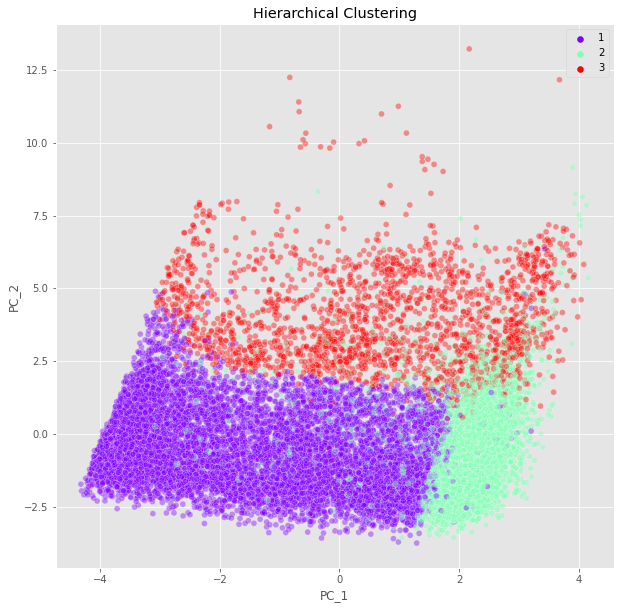

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.scatterplot(x=cluster_sample_df["PC_1"], y=cluster_sample_df["PC_2"], 
                hue=hier.labels_+1 , alpha=.4,
                palette = 'rainbow')
ax.set_title("Hierarchical Clustering")
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
plt.show

It seem that the cluster 1 is overlaps cluster 2.  

 <h2>Level 3</h2>
 <h3>Exercise 3</h3>

Calculate clustering performance using a parameter such as silhouette

In [79]:
cluster_sample_df['Hierarchical_Cluster'] = hier.labels_

In [80]:
cluster_sample_df.T

,258182,437414,1499466,1549589,23091,101715,398768,241648,598168,1213280,...,36359,1040300,1461557,350918,1602376,356393,1790088,1025022,35587,1381707
UniqueCarrier,0.653327,0.484787,-1.706234,0.316247,0.990407,-0.694994,0.990407,0.484787,1.158947,-1.874774,...,1.158947,-1.706234,0.653327,-1.369154,-1.706234,-1.200614,0.484787,0.147707,1.158947,-1.706234
FlightNum,-0.847342,1.694473,-0.718053,2.265929,-0.046269,1.099228,0.818930,2.173358,-1.117814,-0.086090,...,0.276952,-0.574284,-0.859236,-0.774423,-0.475508,-0.688058,1.321605,-0.540669,0.156455,-0.949221
TailNum,1.127343,0.055994,-0.627860,0.582489,-1.094035,0.337928,-0.654742,1.675475,-1.636266,-1.686751,...,-1.471695,-0.281016,-0.405591,1.586305,-0.627860,-0.014162,-0.559671,-0.057436,-1.381869,0.043536
ActualElapsedTime,-0.170773,-1.267080,0.911657,-0.434441,-0.573214,-1.086675,-0.684233,0.051264,0.120651,-0.254036,...,0.772884,-1.045043,1.161449,-0.073631,0.356565,2.757339,-0.684233,-0.642601,0.620234,-0.656478
CRSElapsedTime,0.067416,-1.252189,1.274715,-0.311619,-0.550272,-1.111806,-0.760847,0.025301,0.362222,-0.044891,...,0.769334,-0.901230,1.302791,0.263953,0.221838,2.327591,-0.676617,-0.578348,0.923756,-0.620463
AirTime,-0.149720,-1.242336,0.972032,-0.615903,-0.470221,-1.271472,-0.543062,0.054235,0.272758,-0.193425,...,0.331031,-0.980108,1.263396,0.068803,0.301894,2.574534,-0.645039,-0.674176,0.695236,-0.543062
ArrDelay,-1.305077,-1.305077,0.766238,-1.305077,-1.305077,0.766238,0.766238,-1.305077,-1.305077,0.766238,...,0.766238,0.766238,-1.305077,0.766238,-1.305077,0.766238,0.766238,0.766238,0.766238,-1.305077
DepDelay,-0.621255,-0.527386,0.561494,-0.471064,-0.546159,0.411304,-0.489838,-0.621255,-0.302100,0.749232,...,1.087160,0.448851,-0.602481,0.129697,-0.696350,-0.395969,-0.414743,-0.358422,0.430077,-0.508612
Origin,0.792761,0.131131,0.193549,0.967531,0.031262,-1.604087,-0.205926,-0.830105,0.780277,-1.604087,...,-0.630367,1.292104,-0.143508,1.391973,-0.842588,0.043746,0.642958,-1.229579,-0.630367,-0.817621
Dest,-1.398861,1.250995,-0.854031,0.000362,-1.423626,0.322307,1.684382,-0.593998,1.226230,0.309925,...,1.535792,-0.854031,-0.866413,0.062275,0.446132,1.436732,1.436732,-0.779736,0.309925,-0.730206


In [81]:
kmeans_silhouette = silhouette_score(cluster_sample_df[['PC_1', 'PC_2', 
                                                   'PC_3','PC_4','PC_5']],
                                cluster_sample_df['Cluster']).round(3)
print('K-means score:', kmeans_silhouette)

K-means score: 0.266


In [75]:
hier_silhouette = silhouette_score(cluster_sample_df[['PC_1','PC_2', 
                                                   'PC_3','PC_4','PC_5']],
                                cluster_sample_df['Hierarchical_Cluster']).round(3)
print('Hirearchical Clustering Score:', hier_silhouette)


Hirearchical Clustering Score: 0.242


The Kmeans behave better than the Hirearchical Clustering, but both are overlaps data. Kmeans is less computationally intensive since my laptop can finish the model with out a dead kernel on jupyter notebook.  